In [1]:
#import library
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

 task #1: merging 12 month of sales data into a single file

In [2]:
# Tentukan lokasi file
lokasi_file = "D:\Abalisis data vscode\Sales_Data/Sales_April_2019.csv"  # Ganti dengan nama dan ekstensi file yang sesuai

# Baca file CSV menjadi DataFrame
df = pd.read_csv(lokasi_file)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
#mengecek seluruh file
files = [file for file in os.listdir('D:\Abalisis data vscode\Sales_Data')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
#menggabungkan all data
files = [file for file in os.listdir('D:\Abalisis data vscode\Sales_Data')]

all_month_data = pd.DataFrame()

for file in files:
    data = pd.read_csv('D:\Abalisis data vscode\Sales_Data/'+file)
    all_month_data = pd.concat([all_month_data, data])
    
all_month_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
#save to csv
#all_month_data.to_csv('all_data.csv', index=False)

Read update dataframe

In [6]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
all_data.shape

(186850, 6)

In [8]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
all_data[all_data.isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
186845,NaN,NaN,NaN,NaN,NaN,NaN
186846,NaN,NaN,NaN,NaN,NaN,NaN
186847,NaN,NaN,NaN,NaN,NaN,NaN
186848,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
all_data = all_data.dropna()

In [11]:
all_data.shape

(186305, 6)

In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [13]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

seharusnya #order id integer, quantity integer, price each float, ordate datetime

### pecahkan masalah error diatas

In [14]:
# Menampilkan baris yang bukan angka di kolom 'Order ID'
non_numeric_order_id = all_data[~all_data['Order ID'].str.isdigit()]

print("\nBaris dengan Nilai Non-Numeric di 'Order ID':")
non_numeric_order_id.head()


Baris dengan Nilai Non-Numeric di 'Order ID':


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [15]:
all_data[all_data['Order ID']=='Order ID'].count()

Order ID            355
Product             355
Quantity Ordered    355
Price Each          355
Order Date          355
Purchase Address    355
dtype: int64

#### Ternyata ada beberapa dari kolom order id memiliki isi yang tidak semestinya, dan total error tersebut sebanyak 355

In [16]:
#cek juga pada kolom quantity
# Menampilkan baris yang bukan angka di kolom 'Order ID'
non_numeric_quantity = all_data[~all_data['Quantity Ordered'].str.isdigit()]

print("\nBaris dengan Nilai Non-Numeric di 'Quantity Ordered':")
non_numeric_quantity.head()



Baris dengan Nilai Non-Numeric di 'Quantity Ordered':


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [17]:
#mengubah semua berbentuk no numerik di order id dan 

In [18]:
all_data.duplicated().sum()

618

In [19]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [20]:
# Hapus baris yang duplikat berdasarkan semua kolom
all_data = all_data.drop_duplicates()
# Reset indeks lagi setelah menghapus duplikat
all_data = all_data.reset_index(drop=True)


In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [22]:
#mengubah tyoe data
all_data[['Order ID', 'Quantity Ordered']] = all_data[['Order ID', 'Quantity Ordered']].astype(int)

ValueError: invalid literal for int() with base 10: 'Order ID'

In [23]:
#pembersighan data sudah selesai
all_data2 = all_data.copy()

In [24]:
all_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185687 entries, 0 to 185686
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [25]:
all_data2[all_data2['Product']=='Product']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
516,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [26]:
all_data2[all_data2['Quantity Ordered']=='Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
516,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [27]:
# Hapus baris yang memiliki nilai seperti header yang terduplikat berdasarkan semua kolom
all_data2 = all_data2[~all_data2['Order ID'].str.contains('Order ID')]

# Reset indeks lagi setelah membersihkan data
all_data2 = all_data2.reset_index(drop=True)

# Cetak lima baris pertama dari dataframe hasil penggabungan setelah membersihkan data
all_data2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [28]:
all_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity Ordered  185686 non-null  object
 3   Price Each        185686 non-null  object
 4   Order Date        185686 non-null  object
 5   Purchase Address  185686 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [29]:
all_data2[all_data2['Quantity Ordered']=='Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


# Data Setelah dilakukan tahap cleansing

In [30]:
sales_data = all_data2.copy()

In [31]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [32]:
sales_data.shape

(185686, 6)

In [33]:
sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [34]:
sales_data.duplicated().sum()

0

In [35]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity Ordered  185686 non-null  object
 3   Price Each        185686 non-null  object
 4   Order Date        185686 non-null  object
 5   Purchase Address  185686 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [36]:
#menguvah type data Price ke float and  Order date ke float
sales_data['Price Each'] = sales_data['Price Each'].astype(float)

In [37]:
#mengubah tyoe data
sales_data[['Order ID', 'Quantity Ordered']] = sales_data[['Order ID', 'Quantity Ordered']].astype(int)

In [38]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

In [39]:
sales_data.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int32         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int32         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(2)
memory usage: 7.1+ MB


# Data sudah bersih, selanjutnya Exploratity data anlyst

In [40]:
#membuat kolom baru dengan name month
sales_data['month'] = pd.to_datetime(sales_data['Order Date']).dt.month
sales_data['month'] = sales_data['month'].astype(int)

In [41]:
sales_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4


In [42]:
# Fungsi untuk mengekstrak kota dan negara bagian
def extract_city_state(address):
    parts = address.split(',')
    city = parts[1].strip()
    state = parts[2].strip().split()[0]
    return f"{city} ({state})"

# Menerapkan fungsi ke kolom 'Purchase Address'
sales_data['City_State'] = sales_data['Purchase Address'].apply(extract_city_state)


In [43]:
sales_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City_State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)


In [44]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int32         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int32         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   month             185686 non-null  int32         
 7   City_State        185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(3), object(3)
memory usage: 9.2+ MB


# Exploratoty Data Analyst

Question 1: What was the best month for sales? How much was earned that month? 

In [45]:
#sales
sales_data['sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each'] 

In [47]:
result = sales_data.groupby(['month']).sum()
result.drop(columns=['Order ID', 'Price Each'], inplace=True)
result

,Quantity Ordered,sales
month,,
1,10893,1821413.16
2,13431,2200078.08
3,16979,2804973.35
4,20536,3389217.98
5,18653,3150616.23
6,15234,2576280.15
7,16054,2646461.32
8,13429,2241083.37
9,13091,2094465.69


[]

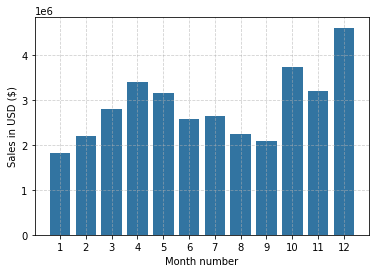

In [48]:
#visualisasi datamonth with sales
ax = sns.barplot(result, x='month', y='sales')
#ax.bar_label(ax.containers[0])

plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.grid(True, linestyle='--', alpha=0.6)
plt.plot()

Penjualan tertinggi ada di bulan 12(desember) sebanyak 4608295.70 dengan total quantity(jumlah terjual) = 28074 product, penjualan tertinggi kedua di bulan 10 sedangkan penjualan terendah/terburuk ada di bulan 1(januari) total produk terjual 10893	dengan total pendapatan 1821413.16

Question 2: What city sold the most product?

In [111]:
# Grouping sales_data by 'City_State' and summing up
city_result = sales_data.groupby(['City_State']).sum().sort_values(by='Quantity Ordered', ascending=False)
# Dropping specific columns from the result
city_result.drop(columns=['Order ID', 'month', 'Price Each'], inplace=True)
city_result

,Quantity Ordered,sales
City_State,,
San Francisco (CA),50169,8254743.55
Los Angeles (CA),33247,5448304.28
New York City (NY),27903,4661867.14
Boston (MA),22494,3658627.65
Dallas (TX),16707,2765373.96
Atlanta (GA),16584,2794199.07
Seattle (WA),16534,2745046.02
Portland (OR),11291,1870010.56
Austin (TX),11137,1818044.33


[]

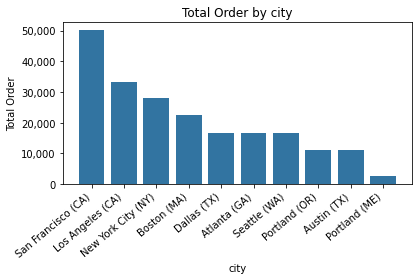

In [113]:
#visualisasi datamonth with sales
import matplotlib.ticker as ticker
#plt.figure(figsize=(10,5))
ax = sns.barplot(city_result, x='City_State', y='Quantity Ordered')

# Mengatur formatter untuk sumbu y
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))  # Format ribuan tanpa desimal
ax.yaxis.set_major_formatter(formatter)
#ax.bar_label(ax.containers[0])
plt.xticks(rotation=40, ha='right')
plt.ylabel('Total Order')
plt.xlabel('city')
plt.title('Total Order by city')
plt.tight_layout() # penyesuaian grafix
plt.plot()

penjualan terbanyak berdasarkan total quantity berada di kota San Francisco (CA) total terjual 50169 dengan total pendapatan 8254743.55 dan pendapatan kota terendah berada di kota Portland (ME) total penjualan 2746  dengan total pendapatan 449321.38

In [57]:
#product apa saja yang terjual di city san frinco 
sales_data[sales_data['City_State']=='San Francisco (CA)'].groupby('Product').agg({'Quantity Ordered': 'sum', 'sales': 'sum'}).sort_values(by='Quantity Ordered', ascending=False).head(5)

,Quantity Ordered,sales
Product,,
AAA Batteries (4-pack),7404,22137.96
AA Batteries (4-pack),6549,25148.16
USB-C Charging Cable,5883,70301.85
Lightning Charging Cable,5540,82823.00
Wired Headphones,4956,59422.44


In [58]:
#product apa saja yang terjual di city san frinco 
sales_data[sales_data['City_State']=='San Francisco (CA)'].groupby('Product').agg({'Quantity Ordered': 'sum', 'sales': 'sum'}).sort_values(by='sales', ascending=False).head(5)

,Quantity Ordered,sales
Product,,
Macbook Pro Laptop,1135,1929500.00
iPhone,1660,1162000.00
ThinkPad Laptop,963,962990.37
Google Phone,1357,814200.00
27in 4K Gaming Monitor,1458,568605.42


Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [63]:
#crate kolom hour
sales_data['hour'] = pd.to_datetime(sales_data['Order Date']).dt.hour

In [64]:
#crate kolom hour
sales_data['minute'] = pd.to_datetime(sales_data['Order Date']).dt.minute

In [65]:
sales_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City_State,sales,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30


[]

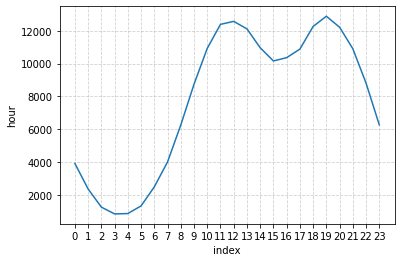

In [66]:
time = sales_data.hour.value_counts().reset_index()
sns.lineplot(time, x='index', y='hour')
plt.grid(True, linestyle='--', alpha=0.6)

# Mengatur xticks agar semua indeks ditampilkan
plt.xticks(ticks=range(24), labels=range(24))
plt.plot()

berdasarkan nilai count pada kolom time hour untuk memaksimalkan kemungkinan pelanggan untuk membeli produk adalah di jam 18-20 dan terjadi lonjakan tertinggi di jam 19 (bisa di katakan jam istirat setelah aktivitas pagi), dan di jam 11-13, terjadi lonjakan pada jam 12 (kemungkinan diakibatkan tersebut jam istirahat)

In [67]:
haur_quanty = sales_data.groupby('hour')['Quantity Ordered'].sum()
haur_quanty.sort_values(ascending=False)

hour
19    14451
12    14188
11    13986
18    13785
20    13758
13    13671
14    12343
10    12292
21    12228
17    12214
16    11636
15    11375
22     9884
9      9808
23     7052
8      6998
7      4547
0      4420
6      2809
1      2616
5      1492
2      1397
4       935
3       927
Name: Quantity Ordered, dtype: int32

#### Cara ke 2

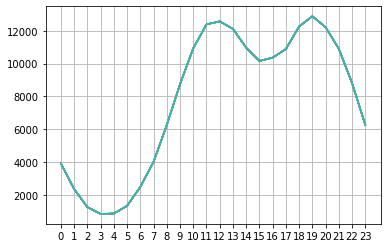

In [68]:
keys = [pair for pair, df in sales_data.groupby(['hour'])]

plt.plot(keys, sales_data.groupby(['hour']).count())
plt.xticks(keys)
plt.grid()
plt.show()

Question 4: What products are most often sold together?

nama prodeuk dengan pejualan paling sering terjual bersama

In [69]:
from itertools import combinations
from collections import Counter
# Menggabungkan produk berdasarkan Order ID
order_products = sales_data.groupby('Order ID')['Product'].apply(list)

# Menghitung frekuensi pasangan produk
product_combinations = Counter()

for products in order_products:
    product_combinations.update(Counter(combinations(products, 2)))

# Menampilkan hasil
most_common_combinations = product_combinations.most_common(10)

print("Pasangan produk yang paling sering dijual bersama:")
for combo, count in most_common_combinations:
    print(f"{combo}: {count} kali")

Pasangan produk yang paling sering dijual bersama:
('iPhone', 'Lightning Charging Cable'): 1002 kali
('Google Phone', 'USB-C Charging Cable'): 985 kali
('iPhone', 'Wired Headphones'): 447 kali
('Google Phone', 'Wired Headphones'): 413 kali
('Vareebadd Phone', 'USB-C Charging Cable'): 361 kali
('iPhone', 'Apple Airpods Headphones'): 360 kali
('Google Phone', 'Bose SoundSport Headphones'): 220 kali
('USB-C Charging Cable', 'Wired Headphones'): 159 kali
('Vareebadd Phone', 'Wired Headphones'): 143 kali
('Lightning Charging Cable', 'Wired Headphones'): 92 kali


question 4. What product sold the most? Why do you think it sold the most?

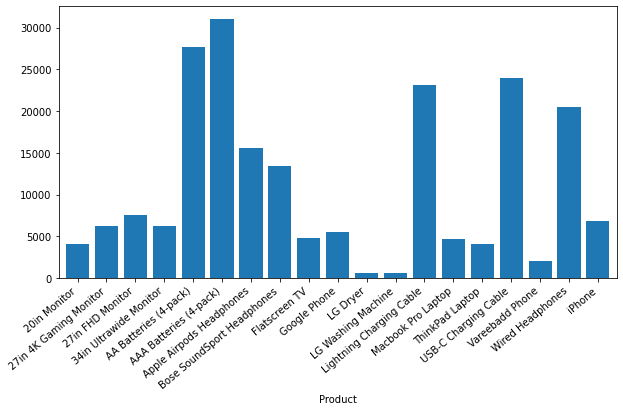

In [70]:
order_product = sales_data.groupby('Product')['Quantity Ordered'].sum()
order_product.plot(kind='bar', figsize=(10,5), width=0.8)
plt.xticks(rotation=40,  ha='right')
plt.show()

In [71]:
print('Max produk', order_product.sort_values(ascending=False).head(2))
print('Min product', order_product.sort_values(ascending=True).head(2))

Max produk Product
AAA Batteries (4-pack)    30986
AA Batteries (4-pack)     27615
Name: Quantity Ordered, dtype: int32
Min product Product
LG Dryer              646
LG Washing Machine    666
Name: Quantity Ordered, dtype: int32


product paling banyak terjual adalah AAA Batteries (4-pack) sebanyak 30986 dan AA Batteries (4-pack) sebanyak 27615, sedangkan product paling sedikit terjual adalah LG Dryer sebanyak 646 dan LG Washing Machine sebanyak 666, penyebab mengapa product tersebut paling banyak terjual dan paling sedikit terjual, dari masalah tersebut dapat kita pecahkan, dengan membandingkan dengan nilai rata rata product per price, diketahui bahwa penjualan paling banyak diakibatkan harga dengan rata - rata price paling murah sedangkan product dengan penjuelan terendah diakibatkan harga per price terlalu mahal.

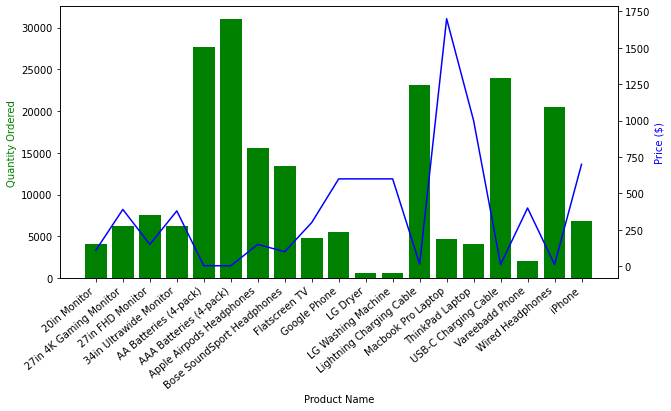

In [72]:

# Mengelompokkan dan menghitung mean Price Each dan sum Quantity Ordered
prices = sales_data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots(figsize=(10, 5))

# Membuat bar plot untuk Quantity Ordered
ax1.bar(order_product.index, order_product, color='g')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')

# Membuat line plot untuk Price Each
ax2 = ax1.twinx()
ax2.plot(prices.index, prices, color='b')
ax2.set_ylabel('Price ($)', color='b')

# Mengatur rotasi dan ukuran xticklabels
ax1.set_xticklabels(order_product.index, rotation=40, ha='right', size=10)

# Menampilkan plot
plt.show()


In [73]:
sales_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City_State,sales,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30


total sales per year

In [74]:
# Menghitung total sales dan quantity berdasarkan tahun
yearly_sales = sales_data.groupby(sales_data['Order Date'].dt.to_period('Y')).agg({'sales': 'sum', 'Quantity Ordered': 'sum'})

print(yearly_sales)

                  sales  Quantity Ordered
Order Date                               
2019        34456867.65            208771
2020            8670.29                41


total penjualan pertahunnya : data terdiri dari tahun 2019 dan 2020, penjualan dan pendapatan tertinggi ada di tahun 2019 dengan total penjualan 208771 dan total pendapatan 34456867.65, sedangkan di tahun hanya meiliki total penjualan 41 dan total pendapatan 8670.29, hal ini diakibatkan penjualan pada tahun 2020 hanya berlangsung 1 bulan (januari)

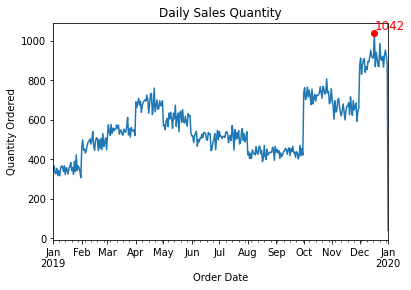

In [118]:
day_sales = sales_data.groupby(sales_data['Order Date'].dt.to_period('D'))['Quantity Ordered'].sum()
day_sales.plot(kind='line')
# Menemukan nilai maksimum
max_value = day_sales.max()
max_day = day_sales.idxmax().to_timestamp()

# Menambahkan tanda merah pada nilai maksimum
plt.plot(max_day, max_value, 'ro')  # 'ro' berarti red color, circle marker
plt.text(max_day, max_value, f'{max_value}', color='red', fontsize=12, ha='left', va='bottom')

# Menambahkan judul dan label
plt.title('Daily Sales Quantity')
plt.xlabel('Order Date')
plt.ylabel('Quantity Ordered')

# Menampilkan plot
plt.show()


In [119]:
print (day_sales.sort_values(ascending=False).head())
# Mengambil top 5 berdasarkan nilai Quantity Ordered
top_5_days = day_sales.nlargest(5)

# Menambahkan nama hari ke dalam hasil
top_5_days = top_5_days.to_frame().reset_index()
top_5_days['Order Date'] = top_5_days['Order Date'].dt.to_timestamp()
top_5_days['Day Name'] = top_5_days['Order Date'].dt.day_name()

# Menampilkan hasil
print(top_5_days[['Order Date', 'Quantity Ordered', 'Day Name']])

Order Date
2019-12-17    1042
2019-12-23     987
2019-12-29     953
2019-12-13     953
2019-12-19     942
Freq: D, Name: Quantity Ordered, dtype: int32
  Order Date  Quantity Ordered  Day Name
0 2019-12-17              1042   Tuesday
1 2019-12-23               987    Monday
2 2019-12-13               953    Friday
3 2019-12-29               953    Sunday
4 2019-12-19               942  Thursday


In [120]:
# Mengelompokkan berdasarkan hari dalam seminggu dan menjumlahkan 'Quantity Ordered'
weekly_sales = sales_data.groupby(sales_data['Order Date'].dt.day_name())['Quantity Ordered'].sum()

# Menampilkan hari dalam seminggu dengan penjualan tertinggi

high_sales_days_weekly = weekly_sales[weekly_sales == weekly_sales.max()]
print(high_sales_days_weekly)


Order Date
Tuesday    30686
Name: Quantity Ordered, dtype: int32


In [121]:
# Buat kolom baru dengan nama hari
sales_data['Hari'] = sales_data['Order Date'].dt.day_name()

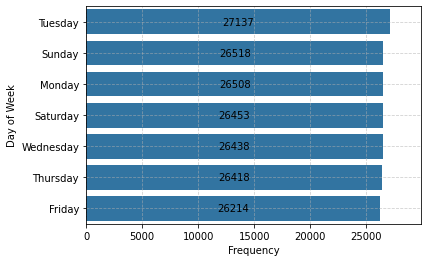

In [122]:
# Mengelompokkan berdasarkan hari dalam seminggu dan menghitung frekuensi penjualan
day_name = sales_data['Order Date'].dt.day_name()
day_frequency = day_name.value_counts().reset_index()

# Menampilkan hari-hari dengan frekuensi penjualan tertinggi
# Memberi nama pada kolom setelah reset index
day_frequency.columns = ['Day of Week', 'Frequency']
day_frequency
ax = sns.barplot(day_frequency, y='Day of Week', x='Frequency')
# Menambahkan label di tengah masing-masing bar
for container in ax.containers:
    ax.bar_label(container, label_type='center')
    ax.set_xlim(0, day_frequency['Frequency'].max() * 1.1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [123]:
sales_data[sales_data['Order Date'].dt.year==2020]['month'].value_counts()

1    34
Name: month, dtype: int64

In [124]:
# Menghitung total sales dan quantity berdasarkan tahun
monthly_sales = sales_data.groupby(sales_data['Order Date'].dt.to_period('M')).agg({'sales': 'sum', 'Quantity Ordered': 'sum'})
monthly_sales


,sales,Quantity Ordered
Order Date,,
2019-01,1812742.87,10852
2019-02,2200078.08,13431
2019-03,2804973.35,16979
2019-04,3389217.98,20536
2019-05,3150616.23,18653
2019-06,2576280.15,15234
2019-07,2646461.32,16054
2019-08,2241083.37,13429
2019-09,2094465.69,13091


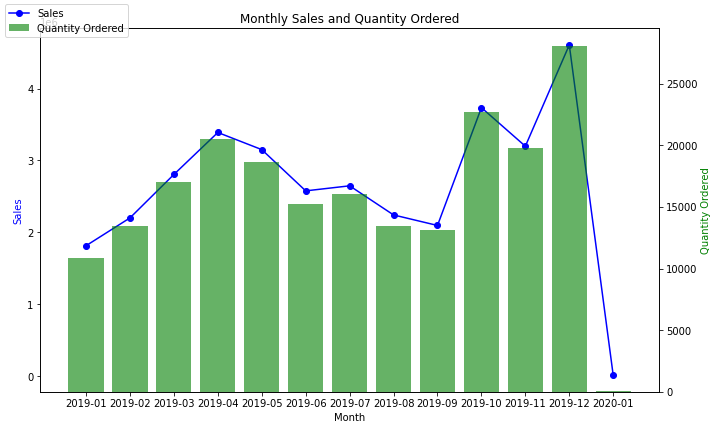

In [125]:
# Visualisasi dengan plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot garis untuk sales
ax1.plot(monthly_sales.index.astype(str), monthly_sales['sales'], marker='o', color='b', label='Sales')
ax1.set_xlabel('Month')
ax1.set_ylabel('Sales', color='b')

# Plot batang untuk Quantity Ordered
ax2 = ax1.twinx()
ax2.bar(monthly_sales.index.astype(str), monthly_sales['Quantity Ordered'], color='g', alpha=0.6, label='Quantity Ordered')
ax2.set_ylabel('Quantity Ordered', color='g')

# Penyesuaian label sumbu x
plt.xticks(rotation=45)
plt.title('Monthly Sales and Quantity Ordered')
plt.tight_layout()

# Menampilkan legenda
fig.legend(loc='upper left')

plt.show()


In [126]:
sales_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City_State,sales,hour,minute,Hari
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,Friday
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,Sunday


In [127]:
#waktu yang tepat pemasaran product berdasarkan kuantity and hour
#nilai modeu dari haour
# Menggunakan fungsi untuk mencari mode
def mode_func(x):
    return x.mode().iloc[0]
product_time = sales_data.groupby('Product').agg({'Quantity Ordered': 'sum', 'hour': mode_func, 'minute': mode_func})
product_time.sort_values(by='Quantity Ordered', ascending=False)

,Quantity Ordered,hour,minute
Product,,,
AAA Batteries (4-pack),30986,19,5
AA Batteries (4-pack),27615,20,54
USB-C Charging Cable,23931,19,34
Lightning Charging Cable,23169,19,36
Wired Headphones,20524,19,19
Apple Airpods Headphones,15637,12,48
Bose SoundSport Headphones,13430,12,27
27in FHD Monitor,7541,19,30
iPhone,6847,11,16


In [128]:
#city mana yang memiliki penjualan terbanyak berdasarkan time
def mode_city (x):
    return x.mode().iloc[0]
state_time = sales_data.groupby('City_State').agg({'Quantity Ordered': 'sum', 'hour': mode_city, 'minute': mode_city})
state_time.sort_values(by='Quantity Ordered', ascending=False)

,Quantity Ordered,hour,minute
City_State,,,
San Francisco (CA),50169,19,27
Los Angeles (CA),33247,11,5
New York City (NY),27903,19,47
Boston (MA),22494,19,21
Dallas (TX),16707,13,11
Atlanta (GA),16584,19,9
Seattle (WA),16534,12,46
Portland (OR),11291,12,55
Austin (TX),11137,19,11


In [129]:
#city = San Francisco (CA)	50169	19	27
#product apa yang sering laku di jam tersebut pada city San Francisco (CA)
city_product = sales_data[(sales_data['City_State']=='San Francisco (CA)') & (sales_data['hour']==19) & (sales_data['minute']==27)]
city_product.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City_State,sales,hour,minute,Hari
5427,181783,Bose SoundSport Headphones,1,99.99,2019-04-19 19:27:00,"832 Elm St, San Francisco, CA 94016",4,San Francisco (CA),99.99,19,27,Friday
10596,186739,Lightning Charging Cable,1,14.95,2019-04-18 19:27:00,"735 Center St, San Francisco, CA 94016",4,San Francisco (CA),14.95,19,27,Thursday


In [130]:

print('Product terjual di city San Francisco di jam 19 menit 27')
city_product.groupby('Product').agg({'Quantity Ordered':'sum', 'sales':'sum'}).sort_values(by=['Quantity Ordered', 'sales'],ascending=False)

Product terjual di city San Francisco di jam 19 menit 27


,Quantity Ordered,sales
Product,,
Lightning Charging Cable,8,119.60
Wired Headphones,8,95.92
USB-C Charging Cable,6,71.70
iPhone,4,2800.00
Bose SoundSport Headphones,4,399.96
AA Batteries (4-pack),4,15.36
AAA Batteries (4-pack),3,8.97
20in Monitor,2,219.98
Macbook Pro Laptop,1,1700.00


In [131]:
# Mencari produk dengan penjualan terbanyak
product_sales = sales_data.groupby('Product')['Quantity Ordered'].sum()
max_product = product_sales.idxmax()  # Produk dengan penjualan terbanyak
max_product_orders = sales_data[sales_data['Product'] == max_product]['Order ID'].unique()[:3]  # Mengambil beberapa Order ID teratas

# Menampilkan hasil Order ID dengan pembelian produk terbanyak
print(f"\nProduk dengan penjualan terbanyak adalah '{max_product}'")
print("Beberapa Order ID dengan total pembelian produk tersebut:")
for order_id in max_product_orders:
    total_quantity = sales_data[sales_data['Order ID'] == order_id]['Quantity Ordered'].sum()
    print(f"Order ID: {order_id}, Total Pembelian: {total_quantity}")


Produk dengan penjualan terbanyak adalah 'AAA Batteries (4-pack)'
Beberapa Order ID dengan total pembelian produk tersebut:
Order ID: 176575, Total Pembelian: 1
Order ID: 176583, Total Pembelian: 2
Order ID: 176586, Total Pembelian: 3


# memastikan analisis dari tabel di atas ini dengan ketentuan AAA Batteries (4-pack)	30986	19	5


In [132]:
#mannual
#mengolompokkn product dengan total quantity
gr = sales_data.groupby('Product')['Quantity Ordered'].sum()
gr.sort_values(ascending=False).head(2)

Product
AAA Batteries (4-pack)    30986
AA Batteries (4-pack)     27615
Name: Quantity Ordered, dtype: int32

In [133]:
#mengelompokkan product berdasarkan modus dari hour
p = sales_data.groupby('Product')['hour'].apply(lambda x: x.mode().iloc[0]).sort_values(ascending=False).head(5)
p

Product
AA Batteries (4-pack)       20
LG Dryer                    20
Lightning Charging Cable    19
27in FHD Monitor            19
Wired Headphones            19
Name: hour, dtype: int64

In [134]:
#memastikan time (hour)
# #gengan filter nama product dengan time(haiur) count tertinggi
sales_data[sales_data['Product']=='AAA Batteries (4-pack)']['hour'].value_counts().head(2)

19    1521
13    1403
Name: hour, dtype: int64

In [135]:
#memastikan kebenaran time (monite)
sales_data[sales_data['Product']=='AAA Batteries (4-pack)']['minute'].value_counts().head()

5     387
47    379
56    376
44    376
22    367
Name: minute, dtype: int64

Cutomer dengan order id berapa yang melakukan order, orderan terbanyak dan sales tertinggi

In [136]:
print('ID sering Order\n', sales_data['Order ID'].value_counts().head(5), '\n--------------------------------------------\n')
print('Id order dengan total pemblian terbanyak\n', sales_data.groupby('Order ID').agg({'Quantity Ordered': 'sum', 'sales': 'sum'}).sort_values(by=['Quantity Ordered', 'sales'], ascending=False).head(10))

ID sering Order
 160873    5
296353    4
304802    4
235798    4
194253    4
Name: Order ID, dtype: int64 
--------------------------------------------

Id order dengan total pemblian terbanyak
           Quantity Ordered    sales
Order ID                           
211097                   9    26.91
226483                   9    26.91
227096                   9    26.91
293622                   8  1020.92
241241                   8   130.92
288689                   8    24.77
224719                   8    23.92
237807                   8    23.92
261442                   8    23.92
278566                   8    23.92


In [137]:
#293622 membeli product apa
sales_data[sales_data['Order ID']==293622]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City_State,sales,hour,minute,Hari
151688,293622,ThinkPad Laptop,1,999.99,2019-11-07 20:35:00,"611 2nd St, Seattle, WA 98101",11,Seattle (WA),999.99,20,35,Thursday
151689,293622,AAA Batteries (4-pack),7,2.99,2019-11-07 20:35:00,"611 2nd St, Seattle, WA 98101",11,Seattle (WA),20.93,20,35,Thursday


In [138]:
sales_data.groupby('Order ID')['sales'].sum().sort_values(ascending=False).head(5)

Order ID
181069    3779.99
210292    3400.00
200528    3400.00
181544    3400.00
307153    2699.99
Name: sales, dtype: float64

In [139]:
sales_data.groupby('Order ID')['Quantity Ordered'].sum().sort_values(ascending=False).head(5)

Order ID
227096    9
211097    9
226483    9
241241    8
278566    8
Name: Quantity Ordered, dtype: int32

In [140]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City_State,sales,hour,minute,Hari
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,Friday
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,Sunday
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,Friday
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,Friday
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,Tuesday


# membangun looping untuk mengelompokkan time 

In [141]:
def categorize_time_of_day(hour):
    if hour < 12:
        return 'Morning'
    elif 12 <= hour < 15:
        return 'Early afternoon'
    else:
        return 'Late afternoon'

sales_data['time_day'] = sales_data['hour'].apply(categorize_time_of_day)

In [142]:
sales_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City_State,sales,hour,minute,Hari,time_day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,Friday,Morning
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,Sunday,Late afternoon


In [143]:
#melihat time penjualan terlaris / sering terjadi pembelian
sales_data.time_day.value_counts(ascending=False)

Late afternoon     94744
Morning            55289
Early afternoon    35653
Name: time_day, dtype: int64

berdasarkan nilai count / nilai total berdasarkan time day diketahui saat late afternoon merupakan waktu paling banyak terjadinya pembelian

In [144]:
#membuktikannya berdasarkan waktu dengan quantity and sales
timeday_result = sales_data.groupby('time_day').agg({'Quantity Ordered': 'sum', 'sales':'sum'})
timeday_result.sort_values(by='Quantity Ordered', ascending=False)


,Quantity Ordered,sales
time_day,,
Late afternoon,106383,17705657.03
Morning,62227,10210637.38
Early afternoon,40202,6549243.53


In [145]:
#name product yang sering terjual bedasarkan waktu
timeday_product = sales_data.groupby(['Product', 'time_day']).agg({'Quantity Ordered': 'sum', 'sales':'sum'})
timeday_product.sort_values(by=['Quantity Ordered', 'time_day'], ascending=False).head(10)

,,Quantity Ordered,sales
Product,time_day,,
AAA Batteries (4-pack),Late afternoon,15626,46721.74
AA Batteries (4-pack),Late afternoon,14210,54566.40
USB-C Charging Cable,Late afternoon,12070,144236.50
Lightning Charging Cable,Late afternoon,11874,177516.30
Wired Headphones,Late afternoon,10412,124839.88
AAA Batteries (4-pack),Morning,9404,28117.96
AA Batteries (4-pack),Morning,8032,30842.88
Apple Airpods Headphones,Late afternoon,7867,1180050.00
USB-C Charging Cable,Morning,7220,86279.00


In [146]:
#atau analisi lebih spesifik di waktu late afternoon
LS_data = sales_data[sales_data['time_day']=='Late afternoon']
LS_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City_State,sales,hour,minute,Hari,time_day
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,Sunday,Late afternoon
10,176567,Google Phone,1,600.00,2019-04-18 17:18:00,"444 7th St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,17,18,Thursday,Late afternoon


In [147]:
LS_data.groupby('Product').agg({'Quantity Ordered':'sum', 'sales': 'sum'}).sort_values(by='Quantity Ordered', ascending=False).head(5)

,Quantity Ordered,sales
Product,,
AAA Batteries (4-pack),15626,46721.74
AA Batteries (4-pack),14210,54566.40
USB-C Charging Cable,12070,144236.50
Lightning Charging Cable,11874,177516.30
Wired Headphones,10412,124839.88


In [148]:
#moorning
sales_data[sales_data['time_day']=='Morning'].groupby('Product').agg({'Quantity Ordered':'sum', 'sales': 'sum'}).sort_values(by='Quantity Ordered', ascending=False).head(5)

,Quantity Ordered,sales
Product,,
AAA Batteries (4-pack),9404,28117.96
AA Batteries (4-pack),8032,30842.88
USB-C Charging Cable,7220,86279.00
Lightning Charging Cable,6932,103633.40
Wired Headphones,6119,73366.81


In [149]:
#Early afternoon
sales_data[sales_data['time_day']=='Early afternoon'].groupby('Product').agg({'Quantity Ordered':'sum', 'sales': 'sum'}).sort_values(by='Quantity Ordered', ascending=False).head(5)

,Quantity Ordered,sales
Product,,
AAA Batteries (4-pack),5956,17808.44
AA Batteries (4-pack),5373,20632.32
USB-C Charging Cable,4641,55459.95
Lightning Charging Cable,4363,65226.85
Wired Headphones,3993,47876.07


In [150]:
#name city yang sering terjual bedasarkan waktu
timeday_city = sales_data.groupby(['City_State', 'time_day']).agg({'Quantity Ordered': 'sum', 'sales':'sum'}).reset_index()
timeday_city.sort_values(by=['Quantity Ordered', 'time_day'], ascending=False).head(10)

,City_State,time_day,Quantity Ordered,sales
25,San Francisco (CA),Late afternoon,25579,4231602.35
13,Los Angeles (CA),Late afternoon,16976,2829845.73
26,San Francisco (CA),Morning,14978,2459394.71
16,New York City (NY),Late afternoon,14210,2396839.26
7,Boston (MA),Late afternoon,11545,1875597.56
14,Los Angeles (CA),Morning,9954,1589258.59
24,San Francisco (CA),Early afternoon,9612,1563746.49
10,Dallas (TX),Late afternoon,8479,1412410.97
28,Seattle (WA),Late afternoon,8441,1425006.03
17,New York City (NY),Morning,8412,1371562.92


In [155]:
timeday_city[timeday_city['time_day']=='Late afternoon'].sort_values(by='Quantity Ordered', ascending=False).head(5)
#.drop(columns=['Order ID', 'month', 'Price Each'], inplace=True)

,City_State,time_day,Quantity Ordered,sales
25,San Francisco (CA),Late afternoon,25579,4231602.35
13,Los Angeles (CA),Late afternoon,16976,2829845.73
16,New York City (NY),Late afternoon,14210,2396839.26
7,Boston (MA),Late afternoon,11545,1875597.56
10,Dallas (TX),Late afternoon,8479,1412410.97


In [152]:
timeday_city[timeday_city['time_day']=='Morning'].sort_values(by='Quantity Ordered', ascending=False).head(5)

,City_State,time_day,Quantity Ordered,sales
26,San Francisco (CA),Morning,14978,2459394.71
14,Los Angeles (CA),Morning,9954,1589258.59
17,New York City (NY),Morning,8412,1371562.92
8,Boston (MA),Morning,6540,1081027.02
2,Atlanta (GA),Morning,4965,862708.00


In [153]:

timeday_city[timeday_city['time_day']=='Early afternoon'].sort_values(by='Quantity Ordered', ascending=False).head(5)

,City_State,time_day,Quantity Ordered,sales
24,San Francisco (CA),Early afternoon,9612,1563746.49
12,Los Angeles (CA),Early afternoon,6317,1029199.96
15,New York City (NY),Early afternoon,5281,893464.96
6,Boston (MA),Early afternoon,4409,702003.07
9,Dallas (TX),Early afternoon,3293,541988.30


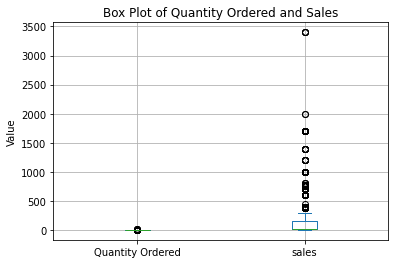

In [154]:
# Plotting a box plot
sales_data[['Quantity Ordered', 'sales']].plot(kind='box')
plt.title('Box Plot of Quantity Ordered and Sales')
plt.ylabel('Value')
plt.grid(True)
plt.show()


In [156]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City_State,sales,hour,minute,Hari,time_day
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,Friday,Morning
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,Sunday,Late afternoon
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,Friday,Early afternoon
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,Friday,Early afternoon
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,Tuesday,Morning


In [157]:

# Menyimpan data ke file CSV
sales_data.to_csv('data_sales_2019.csv', index=False)

# Conclution and rekomendation

#Conslution
1. Bulan apa yang memiliki penjualan terbaik? Berapa jumlah pendapatan pada bulan tersebut?
Penjualan tertinggi ada di bulan 12(desember) sebanyak 4608295.70 dengan total quantity(jumlah terjual) = 28074 product, penjualan tertinggi kedua di bulan 10 sedangkan penjualan terendah/terburuk ada di bulan 1(januari) total produk terjual 10893	dengan total pendapatan 1821413.16

2. Kota mana yang menjual produk terbanyak?
penjualan terbanyak berdasarkan total quantity berada di kota San Francisco (CA) total terjual 50169 dengan total pendapatan 8254743.55

3. Pada jam berapa kita harus menampilkan iklan untuk memaksimalkan kemungkinan pelanggan membeli produk?
berdasarkan hasil analisis pada kolom time hour untuk memaksimalkan kemungkinan pelanggan dalam membeli produk adalah jam 19 karena terjadi lonjakan tertinggi di jam tersebut dengan total penjualan = 14451 unit (bisa di katakan jam istirat setelah aktivitas), dan di jam 12 terjadi lonjakan dengan total penjualan = 14188 unit (kemungkinan diakibatkan tersebut jam istirahat), rekomendasi waktu yang tepat memberikan iklan adalah di jam 12 dan 19

4. Produk apa saja yang paling sering terjual bersamaan?
Berikut Top 3 yang serimg terjual bersamaan, hal ini bisa menjadi rekomendasi teknik penjualan kombinasi
('iPhone', 'Lightning Charging Cable'): 1002 kali
('Google Phone', 'USB-C Charging Cable'): 985 kali
('iPhone', 'Wired Headphones'): 447 kali

5. Produk apa yang paling banyak terjual? Mengapa menurut Anda produk tersebut paling banyak terjual?
product paling banyak terjual adalah AAA Batteries (4-pack) sebanyak 30986 dan AA Batteries (4-pack) sebanyak 27615, sedangkan product paling sedikit terjual adalah LG Dryer sebanyak 646 dan LG Washing Machine sebanyak 666, penyebab mengapa product tersebut paling banyak terjual dan paling sedikit terjual, dari masalah tersebut dapat kita pecahkan, dengan membandingkan dengan nilai rata rata product per price, diketahui bahwa penjualan paling banyak diakibatkan harga dengan rata - rata price paling murah sedangkan product dengan penjuelan terendah diakibatkan harga per price terlalu mahal

6. Berapa total penjualan pertahunnya ?
 data terdiri dari tahun 2019 dan 2020, penjualan dan pendapatan tertinggi ada di tahun 2019 dengan total penjualan 208771 dan total pendapatan 34456867.65, sedangkan di tahun hanya meiliki total penjualan 41 dan total pendapatan 8670.29, hal ini diakibatkan penjualan pada tahun 2020 hanya berlangsung 1 bulan (januari)






#### Analysis kelanjutan
Berdasarkan top 3 product dengan orderan terbanyak: 
1. product terlaris

|Product| Quantity Ordered |hour |minute

|AAA Batteries (4-pack)| 30986	|19	|5

|AA Batteries (4-pack)|	27615	|20	|54

|USB-C Charging Cable|	23931	|19	|34


AAA Batteries (4-pack) adalah produk yang paling banyak terjual dengan jumlah 30,986 unit.
Alasan: Produk ini memiliki harga yang lebih kompetitif/murah dibandingkan product lainnya dan waktu dari penjualan product tersebut adalah 19.05, hal tersebut bisa menjadi trategi Iklan: Untuk memaksimalkan kemungkinan pelanggan membeli produk

2. Kota dengan Penjualan 

City_State | Quantity Ordered | hour | minute
			
San Francisco (CA) | 50169 | 19 | 27

Los Angeles (CA) | 33247 | 11 | 5

New York City (NY) | 27903 | 19 | 47

I. Kota dengan Penjualan Terbanyak:

    - San Francisco (CA) adalah kota yang menjual produk terbanyak dengan total 50,169 unit.
    - Alasan: San Francisco mungkin memiliki pasar yang lebih besar atau permintaan yang lebih tinggi untuk produk-produk tertentu dibandingkan dengan kota lainnya.
II. Waktu Terbaik untuk Iklan di Kota Tertentu:

    - San Francisco (CA): Penjualan tertinggi terjadi sekitar pukul 19:27. Iklan sebaiknya ditampilkan pada waktu ini untuk memaksimalkan penjualan.
    - Los Angeles (CA): Penjualan tertinggi terjadi sekitar pukul 11:05. Iklan sebaiknya ditampilkan pada waktu ini untuk memaksimalkan penjualan.
    - New York City (NY): Penjualan tertinggi terjadi sekitar pukul 19:47. Iklan sebaiknya ditampilkan pada waktu ini untuk memaksimalkan penjualan.
Dengan menyusun strategi iklan yang disesuaikan dengan waktu penjualan tertinggi di masing-masing kota, kita dapat meningkatkan efektivitas iklan dan potensi penjualan.


3. melakukan pengelompokkan waktu.

- waktu < 12 = Morning
- waktu >= 12 < 15 = Early afternoon
- waktu >15 =  Late afternoon


        - Late afternoon: 106,383 unit terjual, pendapatan $17,705,657.03
        - Morning: 62,227 unit terjual, pendapatan $10,210,637.38
        - Early afternoon: 40,202 unit terjual, pendapatan $6,549,243.53
Kesimpulan:

Waktu Penjualan Terbaik:

Late afternoon (sore hari) adalah waktu dengan jumlah penjualan dan pendapatan tertinggi, dengan 106,383 unit terjual dan pendapatan sebesar $17,705,657.03.
Alasan: Pada sore hari, pelanggan mungkin lebih cenderung untuk berbelanja setelah selesai dengan aktivitas harian mereka atau saat mereka sedang bersantai.
Waktu Kedua Terbaik:

Morning (pagi hari) memiliki penjualan dan pendapatan tertinggi kedua, dengan 62,227 unit terjual dan pendapatan sebesar $10,210,637.38.
Alasan: Pada pagi hari, pelanggan mungkin berbelanja saat mereka baru memulai hari mereka, memanfaatkan waktu sebelum mereka sibuk dengan pekerjaan atau aktivitas lainnya.
Waktu Ketiga Terbaik:

Early afternoon (siang hari) memiliki penjualan dan pendapatan terendah di antara ketiga waktu tersebut, dengan 40,202 unit terjual dan pendapatan sebesar $6,549,243.53.
Alasan: Siang hari mungkin merupakan waktu di mana banyak orang sibuk dengan pekerjaan atau aktivitas lain, sehingga mereka memiliki waktu lebih sedikit untuk berbelanja.
Strategi Iklan:

Untuk memaksimalkan penjualan, iklan sebaiknya difokuskan pada sore hari karena ini adalah waktu dengan penjualan dan pendapatan tertinggi.
Iklan juga dapat ditampilkan pada pagi hari sebagai waktu kedua terbaik untuk mencapai pelanggan.
Siang hari dapat digunakan sebagai waktu tambahan untuk iklan, tetapi dengan alokasi sumber daya yang lebih rendah dibandingkan dengan sore dan pagi hari.


setelah saya melakukan pengelompokan di atas ada beberapa hasil analisis yang dapat menjadi infomasi tambahan bahwasannya product AAA Batteries (4-pack) dan city San Francisco (CA) adalah product dan city prioritas dikarenakan product dan city tersebut tidak terpengaruh terhadap waktu hasil penjualan tetap tinggi.